# Value Investing Security Analysis automation 
## Setting up your environment & basic finance math ratios
   ### Jair Medina
   
   
   Tools needed 
   - Anaconda (comes with python 3.8 + jupyter notebook)
   - Yahoo finance
   
   Investing Strategy
   - Will the business be relevant in 10 years ?
   - Does the business have a sustainable edge ?
   - Are the company´s leaders adaptative ?
   - Is the stock undervalued currently ?
   - Use your confidence level for position sizing
 


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("NVIDA_Q.xlsx")
df.dropna(how='all', inplace=True)

In [5]:
index_PL = int(df.loc[df["Data provided by SimFin"]=='Profit & Loss statement'].index[0])
index_CF = int(df.loc[df["Data provided by SimFin"]=='Cash Flow statement'].index[0])
index_BS = int(df.loc[df["Data provided by SimFin"]=='Balance Sheet'].index[0])


In [6]:
print(index_PL)
print(index_CF)
print(index_BS)

1
44
14


In [7]:
df_PL = df.iloc[index_PL:index_BS-2, 1 :]

                                     Unnamed: 1 Unnamed: 2 Unnamed: 3  \
2                                in million USD     Q1 '17     Q2 '17   
3                                       Revenue       1937       2230   
4                               Cost of revenue       -787       -928   
5                                  Gross Profit       1150       1302   
6                            Operating Expenses       -596       -614   
7                       Operating Income (Loss)        554        688   
8                   Non-Operating Income (Loss)        -18         -4   
9                       Abnormal Gains (Losses)          0          0   
10                         Pretax Income (Loss)        536        684   
11            Income Tax (Expense) Benefit, net        -29       -101   
12  Net Income Available to Common Shareholders        507        583   

   Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
2      Q3 '17     Q4 '17     Q1 '18     Q2 '18     

In [8]:
df_PL.columns = df_PL.iloc[0]

2,in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
2,in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
3,Revenue,1937,2230,2636,2911,3207,3123,3181,2205,2220,2579,3014,3105,3080,3866,4726,5003
4,Cost of revenue,-787,-928,-1067,-1110,-1139,-1148,-1260,-998,-924,-1038,-1098,-1090,-1076,-1591,-1766,-1846
5,Gross Profit,1150,1302,1569,1801,2068,1975,1921,1207,1296,1541,1916,2015,2004,2275,2960,3157
6,Operating Expenses,-596,-614,-674,-728,-773,-818,-863,-913,-938,-970,-989,-1025,-1028,-1624,-1562,-1650
7,Operating Income (Loss),554,688,895,1073,1295,1157,1058,294,358,571,927,990,976,651,1398,1507
8,Non-Operating Income (Loss),-18,-4,1,7,16,23,23,30,31,35,32,26,6,-42,-50,-37
9,Abnormal Gains (Losses),0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Pretax Income (Loss),536,684,896,1080,1311,1180,1081,324,389,606,959,1016,982,609,1348,1470
11,"Income Tax (Expense) Benefit, net",-29,-101,-58,39,-67,-79,149,242,5,-54,-60,-65,-64,13,-12,-14


In [9]:
df_PL.set_index("in million USD", inplace=True)

2,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
in million USD,,,,,,,,,,,,,,,,
in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
Revenue,1937,2230,2636,2911,3207,3123,3181,2205,2220,2579,3014,3105,3080,3866,4726,5003
Cost of revenue,-787,-928,-1067,-1110,-1139,-1148,-1260,-998,-924,-1038,-1098,-1090,-1076,-1591,-1766,-1846
Gross Profit,1150,1302,1569,1801,2068,1975,1921,1207,1296,1541,1916,2015,2004,2275,2960,3157
Operating Expenses,-596,-614,-674,-728,-773,-818,-863,-913,-938,-970,-989,-1025,-1028,-1624,-1562,-1650
Operating Income (Loss),554,688,895,1073,1295,1157,1058,294,358,571,927,990,976,651,1398,1507
Non-Operating Income (Loss),-18,-4,1,7,16,23,23,30,31,35,32,26,6,-42,-50,-37
Abnormal Gains (Losses),0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pretax Income (Loss),536,684,896,1080,1311,1180,1081,324,389,606,959,1016,982,609,1348,1470


In [10]:
df_PL.fillna(0, inplace=True)

2,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
in million USD,,,,,,,,,,,,,,,,
in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
Revenue,1937,2230,2636,2911,3207,3123,3181,2205,2220,2579,3014,3105,3080,3866,4726,5003
Cost of revenue,-787,-928,-1067,-1110,-1139,-1148,-1260,-998,-924,-1038,-1098,-1090,-1076,-1591,-1766,-1846
Gross Profit,1150,1302,1569,1801,2068,1975,1921,1207,1296,1541,1916,2015,2004,2275,2960,3157
Operating Expenses,-596,-614,-674,-728,-773,-818,-863,-913,-938,-970,-989,-1025,-1028,-1624,-1562,-1650
Operating Income (Loss),554,688,895,1073,1295,1157,1058,294,358,571,927,990,976,651,1398,1507
Non-Operating Income (Loss),-18,-4,1,7,16,23,23,30,31,35,32,26,6,-42,-50,-37
Abnormal Gains (Losses),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pretax Income (Loss),536,684,896,1080,1311,1180,1081,324,389,606,959,1016,982,609,1348,1470


In [11]:
df_PL = df_PL[1:]

2,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
in million USD,,,,,,,,,,,,,,,,
Revenue,1937,2230,2636,2911,3207,3123,3181,2205,2220,2579,3014,3105,3080,3866,4726,5003
Cost of revenue,-787,-928,-1067,-1110,-1139,-1148,-1260,-998,-924,-1038,-1098,-1090,-1076,-1591,-1766,-1846
Gross Profit,1150,1302,1569,1801,2068,1975,1921,1207,1296,1541,1916,2015,2004,2275,2960,3157
Operating Expenses,-596,-614,-674,-728,-773,-818,-863,-913,-938,-970,-989,-1025,-1028,-1624,-1562,-1650
Operating Income (Loss),554,688,895,1073,1295,1157,1058,294,358,571,927,990,976,651,1398,1507
Non-Operating Income (Loss),-18,-4,1,7,16,23,23,30,31,35,32,26,6,-42,-50,-37
Abnormal Gains (Losses),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Pretax Income (Loss),536,684,896,1080,1311,1180,1081,324,389,606,959,1016,982,609,1348,1470
"Income Tax (Expense) Benefit, net",-29,-101,-58,39,-67,-79,149,242,5,-54,-60,-65,-64,13,-12,-14


In [12]:
df_BS = df.iloc[index_BS-1:index_CF-3, 1:]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
15,in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
16,Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,"Cash, Cash Equivalents & Short Term Investments",6206,5877,6320,7108,7300,7943,7591,7422,7802,8475,9769,10897,16354,10981,10139,11561
18,Accounts & Notes Receivable,976,1213,1167,1265,1220,1662,2219,1424,1242,1561,1455,1657,1907,2084,2546,2429
19,Inventories,821,855,857,796,797,1090,1417,1575,1426,1204,1047,979,1128,1401,1495,1826
20,Other Short Term Assets,113,125,135,86,131,136,159,136,159,151,149,157,195,215,213,239
21,Total Current Assets,8116,8070,8479,9255,9448,10831,11386,10557,10629,11391,12420,13690,19584,14681,14393,16055
22,"Property, Plant & Equipment, Net",539,578,600,997,1066,1162,1292,1404,1473,1484,1517,1674,1715,1964,2059,2149
23,Other Long Term Assets,755,754,751,989,946,889,979,1331,1919,1900,1873,1951,1955,8535,10429,10587
24,Total Noncurrent Assets,1294,1332,1351,1986,2012,2051,2271,2735,3392,3384,3390,3625,3670,10499,12488,12736


In [13]:
df_BS.columns = df_BS.iloc[0]

15,in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
15,in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
16,Assets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,"Cash, Cash Equivalents & Short Term Investments",6206,5877,6320,7108,7300,7943,7591,7422,7802,8475,9769,10897,16354,10981,10139,11561
18,Accounts & Notes Receivable,976,1213,1167,1265,1220,1662,2219,1424,1242,1561,1455,1657,1907,2084,2546,2429
19,Inventories,821,855,857,796,797,1090,1417,1575,1426,1204,1047,979,1128,1401,1495,1826
20,Other Short Term Assets,113,125,135,86,131,136,159,136,159,151,149,157,195,215,213,239
21,Total Current Assets,8116,8070,8479,9255,9448,10831,11386,10557,10629,11391,12420,13690,19584,14681,14393,16055
22,"Property, Plant & Equipment, Net",539,578,600,997,1066,1162,1292,1404,1473,1484,1517,1674,1715,1964,2059,2149
23,Other Long Term Assets,755,754,751,989,946,889,979,1331,1919,1900,1873,1951,1955,8535,10429,10587
24,Total Noncurrent Assets,1294,1332,1351,1986,2012,2051,2271,2735,3392,3384,3390,3625,3670,10499,12488,12736


In [14]:
df_BS.set_index("in million USD", inplace=True)

In [16]:
df_BS.fillna(0, inplace=True)

15,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
in million USD,,,,,,,,,,,,,,,,
in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
Assets,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Cash, Cash Equivalents & Short Term Investments",6206,5877,6320,7108,7300,7943,7591,7422,7802,8475,9769,10897,16354,10981,10139,11561
Accounts & Notes Receivable,976,1213,1167,1265,1220,1662,2219,1424,1242,1561,1455,1657,1907,2084,2546,2429
Inventories,821,855,857,796,797,1090,1417,1575,1426,1204,1047,979,1128,1401,1495,1826
Other Short Term Assets,113,125,135,86,131,136,159,136,159,151,149,157,195,215,213,239
Total Current Assets,8116,8070,8479,9255,9448,10831,11386,10557,10629,11391,12420,13690,19584,14681,14393,16055
"Property, Plant & Equipment, Net",539,578,600,997,1066,1162,1292,1404,1473,1484,1517,1674,1715,1964,2059,2149
Other Long Term Assets,755,754,751,989,946,889,979,1331,1919,1900,1873,1951,1955,8535,10429,10587


In [17]:
df_BS = df_BS[1:]
df_BS

15,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
in million USD,,,,,,,,,,,,,,,,
Assets,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Cash, Cash Equivalents & Short Term Investments",6206,5877,6320,7108,7300,7943,7591,7422,7802,8475,9769,10897,16354,10981,10139,11561
Accounts & Notes Receivable,976,1213,1167,1265,1220,1662,2219,1424,1242,1561,1455,1657,1907,2084,2546,2429
Inventories,821,855,857,796,797,1090,1417,1575,1426,1204,1047,979,1128,1401,1495,1826
Other Short Term Assets,113,125,135,86,131,136,159,136,159,151,149,157,195,215,213,239
Total Current Assets,8116,8070,8479,9255,9448,10831,11386,10557,10629,11391,12420,13690,19584,14681,14393,16055
"Property, Plant & Equipment, Net",539,578,600,997,1066,1162,1292,1404,1473,1484,1517,1674,1715,1964,2059,2149
Other Long Term Assets,755,754,751,989,946,889,979,1331,1919,1900,1873,1951,1955,8535,10429,10587
Total Noncurrent Assets,1294,1332,1351,1986,2012,2051,2271,2735,3392,3384,3390,3625,3670,10499,12488,12736


In [18]:
df_CF = df.iloc[index_CF-2:,1:]

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
45,in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
46,Net Income/Starting Line,507,584,837,1119,1244,1101,1230,566,394,553,898,951,917,622,1336,1457
47,Depreciation & Amortization,47,49,49,54,57,59,68,78,91,92,92,106,107,404,299,288
48,Non-Cash Items,119,182,156,-386,172,181,42,-198,134,241,249,243,244,285,333,233
49,Change in Working Capital,-391,-110,115,571,-28,-428,-853,452,101,50,401,165,-359,256,-689,89
50,Cash from Operating Activities,282,705,1157,1358,1445,913,487,898,720,936,1640,1465,909,1567,1279,2067
51,Change in Fixed Assets & Intangibles,-54,-54,-69,-416,-118,-129,-150,-203,-128,-113,-103,-145,-155,-217,-473,-283
52,Net Change in Long Term Investment,813,327,365,400,-3433,-669,371,243,1623,3660,1363,2,-860,-6135,-178,-2816
53,Net Cash From Acquisitions & Divestitures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4,-34,-7137,-1353,0
54,Other Investing Activities,-5,-11,-10,-8,0,-7,-2,0,NaN,-2,-4,-4,-6,-1,3,-30


In [19]:
df_CF.columns = df_CF.iloc[0]

45,in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
45,in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
46,Net Income/Starting Line,507,584,837,1119,1244,1101,1230,566,394,553,898,951,917,622,1336,1457
47,Depreciation & Amortization,47,49,49,54,57,59,68,78,91,92,92,106,107,404,299,288
48,Non-Cash Items,119,182,156,-386,172,181,42,-198,134,241,249,243,244,285,333,233
49,Change in Working Capital,-391,-110,115,571,-28,-428,-853,452,101,50,401,165,-359,256,-689,89
50,Cash from Operating Activities,282,705,1157,1358,1445,913,487,898,720,936,1640,1465,909,1567,1279,2067
51,Change in Fixed Assets & Intangibles,-54,-54,-69,-416,-118,-129,-150,-203,-128,-113,-103,-145,-155,-217,-473,-283
52,Net Change in Long Term Investment,813,327,365,400,-3433,-669,371,243,1623,3660,1363,2,-860,-6135,-178,-2816
53,Net Cash From Acquisitions & Divestitures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4,-34,-7137,-1353,0
54,Other Investing Activities,-5,-11,-10,-8,0,-7,-2,0,NaN,-2,-4,-4,-6,-1,3,-30


In [20]:
df_CF = df_CF[1:]

45,in million USD,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
46,Net Income/Starting Line,507,584,837,1119,1244,1101,1230,566,394,553,898,951,917,622,1336,1457
47,Depreciation & Amortization,47,49,49,54,57,59,68,78,91,92,92,106,107,404,299,288
48,Non-Cash Items,119,182,156,-386,172,181,42,-198,134,241,249,243,244,285,333,233
49,Change in Working Capital,-391,-110,115,571,-28,-428,-853,452,101,50,401,165,-359,256,-689,89
50,Cash from Operating Activities,282,705,1157,1358,1445,913,487,898,720,936,1640,1465,909,1567,1279,2067
51,Change in Fixed Assets & Intangibles,-54,-54,-69,-416,-118,-129,-150,-203,-128,-113,-103,-145,-155,-217,-473,-283
52,Net Change in Long Term Investment,813,327,365,400,-3433,-669,371,243,1623,3660,1363,2,-860,-6135,-178,-2816
53,Net Cash From Acquisitions & Divestitures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4,-34,-7137,-1353,0
54,Other Investing Activities,-5,-11,-10,-8,0,-7,-2,0,NaN,-2,-4,-4,-6,-1,3,-30
55,Cash from Investing Activities,754,262,286,-24,-3551,-805,219,40,1495,3545,1256,-151,-1055,-13490,-2001,-3129


In [21]:
df_CF.set_index("in million USD", inplace=True)

In [23]:
df_CF.fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


45,Q1 '17,Q2 '17,Q3 '17,Q4 '17,Q1 '18,Q2 '18,Q3 '18,Q4 '18,Q1 '19,Q2 '19,Q3 '19,Q4 '19,Q1 '20,Q2 '20,Q3 '20,Q4 '20
in million USD,,,,,,,,,,,,,,,,
Net Income/Starting Line,507,584,837,1119,1244,1101,1230,566,394,553,898,951,917,622,1336,1457
Depreciation & Amortization,47,49,49,54,57,59,68,78,91,92,92,106,107,404,299,288
Non-Cash Items,119,182,156,-386,172,181,42,-198,134,241,249,243,244,285,333,233
Change in Working Capital,-391,-110,115,571,-28,-428,-853,452,101,50,401,165,-359,256,-689,89
Cash from Operating Activities,282,705,1157,1358,1445,913,487,898,720,936,1640,1465,909,1567,1279,2067
Change in Fixed Assets & Intangibles,-54,-54,-69,-416,-118,-129,-150,-203,-128,-113,-103,-145,-155,-217,-473,-283
Net Change in Long Term Investment,813,327,365,400,-3433,-669,371,243,1623,3660,1363,2,-860,-6135,-178,-2816
Net Cash From Acquisitions & Divestitures,0,0,0,0,0,0,0,0,0,0,0,-4,-34,-7137,-1353,0
Other Investing Activities,-5,-11,-10,-8,0,-7,-2,0,0,-2,-4,-4,-6,-1,3,-30


In [28]:
df_PL = df_PL.T

in million USD,Revenue,Cost of revenue,Gross Profit,Operating Expenses,Operating Income (Loss),Non-Operating Income (Loss),Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Net Income Available to Common Shareholders
2,,,,,,,,,,
Q1 '17,1937,-787,1150,-596,554,-18,0,536,-29,507
Q2 '17,2230,-928,1302,-614,688,-4,0,684,-101,583
Q3 '17,2636,-1067,1569,-674,895,1,0,896,-58,838
Q4 '17,2911,-1110,1801,-728,1073,7,0,1080,39,1119
Q1 '18,3207,-1139,2068,-773,1295,16,0,1311,-67,1244
Q2 '18,3123,-1148,1975,-818,1157,23,0,1180,-79,1101
Q3 '18,3181,-1260,1921,-863,1058,23,0,1081,149,1230
Q4 '18,2205,-998,1207,-913,294,30,0,324,242,566
Q1 '19,2220,-924,1296,-938,358,31,0,389,5,394


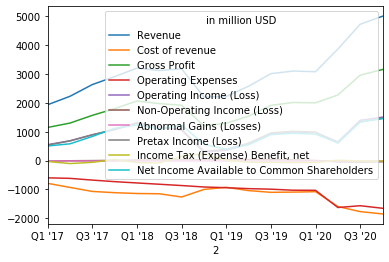

In [29]:
%matplotlib inline
df_PL.plot()

In [31]:
df_PL.columns


Index(['Revenue', 'Cost of revenue', 'Gross Profit', 'Operating Expenses',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, net',
       'Net Income Available to Common Shareholders'],
      dtype='object', name='in million USD')

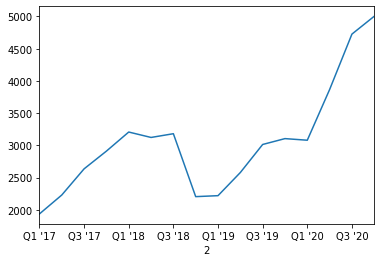

In [32]:
df_PL["Revenue"].plot()